# Business Problem Statement

The problems we will address is "What should be the housing price (y) giving the variables (X) such as 
 - location features (province, district, subdistrict, address, latitude, longtitude)
 - housing features (property type, total units, bedrooms, baths, floor area, floor level, land area)
 - neighborhood features (nearby stations, nearby bus stops, nearby super markets)
 - time features (year and month built)"

The audience of this problem is the house/condo/apartment sellers in Bangkok and sorrounding provinces. So they can sell the house at the best price by using the predicted price as the baseline for advertising and sales negotiation.

We will address this problem by creating the model that predict price with low errors (or biases), evaluated by Root Mean Squared Error (RMSE), yet have the low variance, so it can be used for other different cases as well. 

We will use the linear regression model, Ridge model and Lasso model. 


# Procedure

---------------import---------------------

1. Import the library 
2. Load datasets to jupyter notebook 

---------------train data ----------------

1. Check train data 
    - check shape
    - check head
    - check data type
    - check descriptive statistics
    - check mode
    - check distribution 
    - check outliers 
    - check null values 
    - check descriptive statistics by propertype 

2. clean & transform train data   
    - treat missing data 
    - treat outlier data
    - treat wrong data type
    - treat inaccurate data 
    - Extract categorical data into numerical data

3. EDA train data
    - study of target price
    - check features' relationship with target price 
    - check features' p value 
    
4. build and evaluate the model on train data  
    - modeling approach
    - feature engineering
    - linear regression
    - linear regression scaled
    - ridge
    - ridge scaled
    - lasso
    - lasso scaled
    - modeling result comparision and summary

---------------test data ----------------

1. Check test data 
    - check shape
    - check head
    - check data type
    - check descriptive statistics
    - check mode
    - check distribution 
    - check outliers 
    - check null values 
    - check descriptive statistics by propertype 

2. clean & transform test data   
    - treat missing data 
    - treat outlier data
    - treat wrong data type
    - treat inaccurate data 
    - Extract categorical data into numerical data

3. predict target price on test data 
    - feature engineering
    - selected model prediction 

---------------submission ----------------

1. Generate the submission file & Upload to kaggle
2. Conclusion with recommendation to the business problem

# ------- IMPORT ---------

In [76]:
!pip install missingno

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [78]:
train = pd.read_json('data/train.json')
test = pd.read_json('data/test.json')

# ---------- TRAIN DATA -----------

# 1 Check train data set

In [79]:
train.shape

(14271, 23)

In [80]:
train.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000


In [81]:
train.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

In [82]:
train.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                3762
bedrooms                     43
baths                        35
floor_area                    0
floor_level                6178
land_area                  9354
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    7043
nearby_bus_stops           8262
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64

In [83]:
train.describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,price
count,1.427100e+04,10509.000000,14228.000000,14236.000000,14271.000000,8093.000000,4917.000000,14271.000000,14271.000000,14271.000000,6009.000000,13885.000000,14271.000000,14271.000000,1.427100e+04
mean,1.062614e+07,712.655438,1.880728,1.618292,79.867283,11.322995,242.963596,13.762814,100.565017,0.956415,14.049426,9.002161,10.447060,1422.737440,4.044124e+06
std,8.030103e+05,554.558340,1.092817,0.872875,69.701181,9.064835,3083.223006,0.092787,0.089575,1.085255,6.496828,5.348001,6.950903,917.737592,2.179909e+06
min,1.025114e+06,1.000000,1.000000,0.000000,1.000000,1.000000,16.000000,13.517062,100.273931,0.000000,1.000000,1.000000,1.000000,0.000000,4.800000e+05
25%,1.064588e+07,318.000000,1.000000,1.000000,32.000000,4.000000,80.000000,13.705177,100.512628,0.000000,8.000000,5.000000,4.000000,0.000000,2.250000e+06
50%,1.086984e+07,554.000000,1.000000,1.000000,47.000000,8.000000,116.000000,13.753742,100.569721,1.000000,17.000000,8.000000,9.000000,2013.000000,3.500000e+06
75%,1.097710e+07,945.000000,3.000000,2.000000,112.000000,17.000000,212.000000,13.837514,100.608786,2.000000,20.000000,13.000000,19.000000,2017.000000,5.500000e+06
max,1.104790e+07,4000.000000,10.000000,9.000000,766.000000,55.000000,137664.000000,14.022246,100.905485,3.000000,20.000000,20.000000,20.000000,2023.000000,9.999000e+06


In [84]:
train.mode(axis=0, numeric_only=False, dropna=True)

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,1025114,Bangkok,Mueang Nonthaburi,Samrong Nuea,Sukhumvit Road,Condo,1232.0,1.0,1.0,35.0,...,100.383479,0.0,"[[PP10 Bang Krasor MRT, 260], [PP09 Yaek Nonth...",20.0,6.0,20.0,0.0,June,[],4500000.0
1,1421378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1422670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2072642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2111666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,11047822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14267,11047884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14268,11047888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14269,11047889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
def outliers(data, sigma=3):
    x = data.mean()
    y = data.std()
    outlier_data = (data > (x+(y*sigma))) | (data  < (x-(y*sigma)))
    print('top 10 values are')
    print(data.sort_values(axis=0, ascending=False).head(10))
    print(f'total number of outliers = {(outlier_data).sum()}')
    print('Distribution of data is')
    plt.hist(data, bins=50)
    plt.ylabel('value')
    plt.xlabel('bin')
    plt.title('feataure distribution')

top 10 values are
11224    4000.0
5871     4000.0
5201     4000.0
11356    4000.0
11055    4000.0
6790     4000.0
9167     4000.0
5037     4000.0
2126     4000.0
9844     4000.0
Name: total_units, dtype: float64
total number of outliers = 142
Distribution of data is


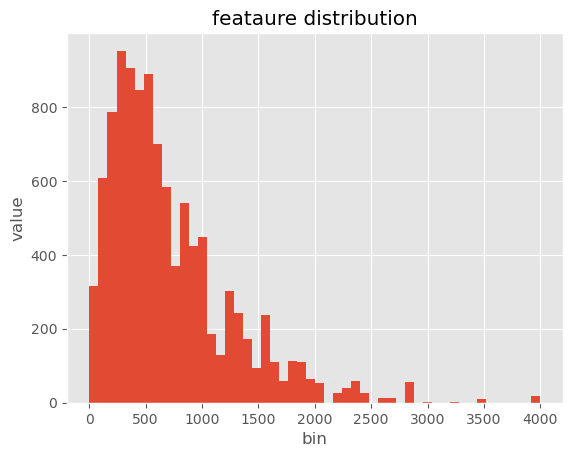

In [86]:
outliers(train['total_units'], sigma=3)

top 10 values are
9545     10.0
864      10.0
12073    10.0
14227     9.0
9340      9.0
6626      8.0
9363      8.0
8008      8.0
4780      8.0
11980     8.0
Name: bedrooms, dtype: float64
total number of outliers = 59
Distribution of data is


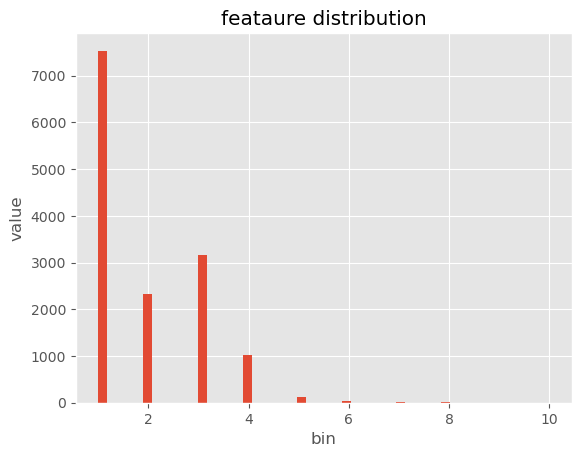

In [87]:
outliers(train['bedrooms'], sigma=3)

top 10 values are
9545     9.0
6626     8.0
14227    8.0
8008     8.0
10840    7.0
11980    7.0
11243    7.0
13332    6.0
3694     6.0
12073    6.0
Name: baths, dtype: float64
total number of outliers = 100
Distribution of data is


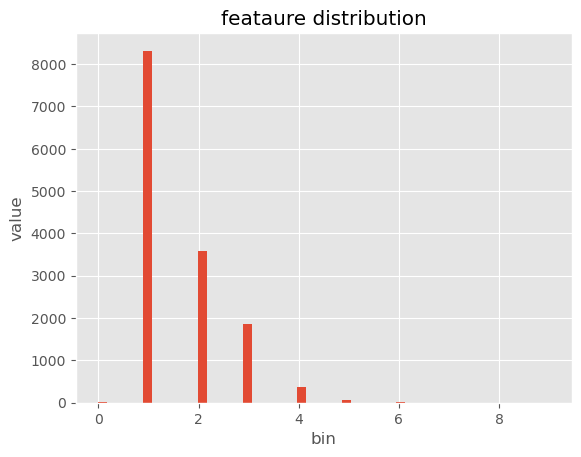

In [88]:
outliers(train['baths'], sigma=3)

top 10 values are
9877    766
2968    700
5055    684
8725    683
2147    650
5325    600
9984    600
2154    560
4746    551
8242    544
Name: floor_area, dtype: int64
total number of outliers = 209
Distribution of data is


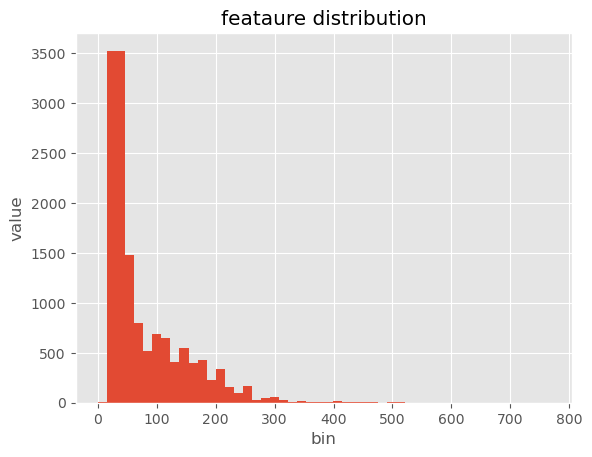

In [89]:
outliers(train['floor_area'], sigma=3)

top 10 values are
1101     55.0
6917     55.0
12432    52.0
13105    52.0
7374     52.0
7782     52.0
2351     51.0
4862     51.0
1876     51.0
3668     51.0
Name: floor_level, dtype: float64
total number of outliers = 62
Distribution of data is


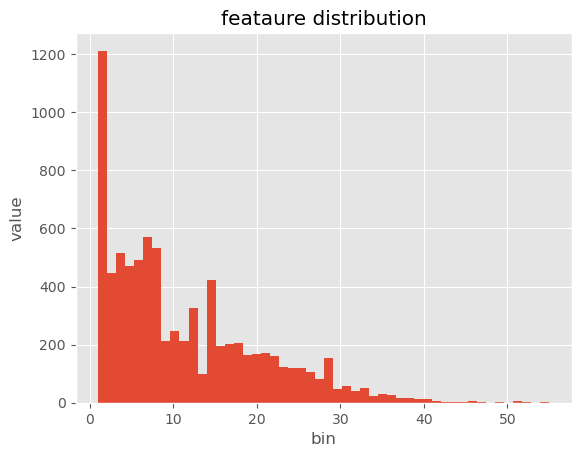

In [90]:
outliers(train['floor_level'], sigma=3)

top 10 values are
9551     137664.0
5463     121600.0
9067     111680.0
13768     18228.0
5900       8800.0
9591       8072.0
7468       7420.0
9304       6608.0
5225       6204.0
12774      4204.0
Name: land_area, dtype: float64
total number of outliers = 4
Distribution of data is


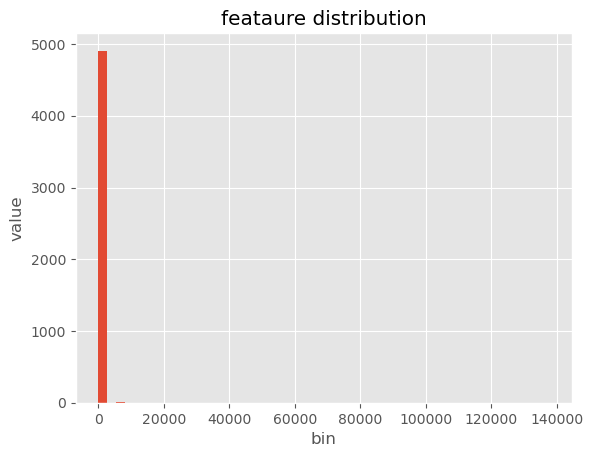

In [91]:
outliers(train['land_area'], sigma=3)

In [92]:
condo_housing_features = train.loc[train['property_type'] == 'Condo', ['total_units','bedrooms','baths','floor_area','floor_level','land_area','facilities']]
townhouse_housing_features = train.loc[train['property_type'] == 'Townhouse', ['total_units','bedrooms','baths','floor_area','floor_level','land_area','facilities']]
detachedhouse_housing_features = train.loc[train['property_type'] == 'Detached House', ['total_units','bedrooms','baths','floor_area','floor_level','land_area','facilities']] 
train['property_type'].value_counts()

property_type
Condo             9206
Townhouse         2896
Detached House    2169
Name: count, dtype: int64

In [93]:
condo_housing_features.describe()

,total_units,bedrooms,baths,floor_area,floor_level,land_area
count,9033.000000,9185.000000,9187.000000,9206.000000,7348.000000,0.0
mean,770.785232,1.188568,1.109938,39.434282,12.298040,NaN
std,564.597971,0.409677,0.330430,16.033621,8.944906,NaN
min,1.000000,1.000000,0.000000,20.000000,1.000000,NaN
25%,373.000000,1.000000,1.000000,29.000000,5.000000,NaN
50%,627.000000,1.000000,1.000000,35.000000,9.000000,NaN
75%,1002.000000,1.000000,1.000000,46.000000,18.000000,NaN
max,4000.000000,8.000000,8.000000,450.000000,55.000000,NaN


In [94]:
condo_housing_features.mode(axis=0, numeric_only=False, dropna=True)

,total_units,bedrooms,baths,floor_area,floor_level,land_area,facilities
0,1232.0,1.0,1.0,35,7.0,NaN,"[Covered car park, CCTV, Fitness corner, 24 ho..."


In [95]:
townhouse_housing_features.describe()

,total_units,bedrooms,baths,floor_area,floor_level,land_area
count,728.000000,2885.000000,2888.000000,2896.000000,421.000000,2803.000000
mean,308.175824,2.991681,2.437673,128.721685,1.691211,152.204067
std,246.563694,0.737776,0.760285,54.270466,0.904825,2608.797588
min,30.000000,1.000000,0.000000,1.000000,1.000000,16.000000
25%,187.000000,3.000000,2.000000,95.000000,1.000000,72.000000
50%,280.000000,3.000000,2.000000,116.000000,2.000000,84.000000
75%,393.000000,3.000000,3.000000,155.000000,2.000000,104.000000
max,3280.000000,10.000000,7.000000,494.000000,12.000000,137664.000000


In [96]:
townhouse_housing_features.mode(axis=0, numeric_only=False, dropna=True)

,total_units,bedrooms,baths,floor_area,floor_level,land_area,facilities
0,238.0,3.0,2.0,100,1.0,72.0,[]


In [97]:
detachedhouse_housing_features.describe()

,total_units,bedrooms,baths,floor_area,floor_level,land_area
count,748.000000,2158.000000,2161.000000,2169.000000,324.000000,2114.000000
mean,404.332888,3.341520,2.684405,186.249885,1.725309,363.303690
std,342.266108,0.780291,0.806445,74.164823,1.626553,3614.738823
min,38.000000,1.000000,0.000000,20.000000,1.000000,20.000000
25%,193.750000,3.000000,2.000000,141.000000,1.000000,196.000000
50%,309.000000,3.000000,3.000000,171.000000,2.000000,216.000000
75%,429.500000,4.000000,3.000000,210.000000,2.000000,260.000000
max,3036.000000,10.000000,9.000000,766.000000,24.000000,121600.000000


In [98]:
detachedhouse_housing_features.mode(axis=0, numeric_only=False, dropna=True)

,total_units,bedrooms,baths,floor_area,floor_level,land_area,facilities
0,1337.0,3.0,3.0,200,2.0,200.0,[]


# 2. clean & transform train data set  


## Missing Value Treatment

out of 23 columns, there are 10 columns that have missing data.
within these 10 columns, there are 3 type of missing values 
1) small missing value : 4 columns including subdistrict(11), bedrooms(43), baths(35), and nearby_supermarkets(386) have small number of missing values  

for these columns, we decide drop the row that have missing values because ... 

 - the total drop row = 11+43+35+386 = 475 rows
 - 475 rows / 14271 rows = 3.3% 
 - 3.3% is less that 5% so it has no significant impact in droping

2) large missing value : 5 columns including total_units(3762),floor_level(6178), land_area(9354), nearby_station_distance (7043), nearby_bus_stops(8262) have large number of missing values

   because these columns are different, we will treat them differently as following:

 - nearby_station_distance(7043) is the categorical, so we will extract the name of station and do one-hot-encoded in "map categorical data" section because we believe that each station has different number of passengers which have significant impact target price 
 
 - nearby_bus_stops(8262) is the numerical data, and we believe that null data mean no nearby shop, so we will replace null value with "0"
         
 - total_unit(3762),floor_level(6178),and land_area(9354) are all numericall data and we considered the missing data in these 3 columns as MAR, however based on EDA, we found that these 3 columns has correlation with property type, therefore we will impute these 3 columns using mean data based on each property type (condo, townhouse, detached house)

3) large missing value but no impact: 1 columns which is month_built(5874) have large missing value but consider not useful for modeling therefore, we will do nothing (we will not either drop or impute for this column)


In [99]:
# 1) small missing value : 
# subdistrict(11), bedrooms(43), baths(35), and nearby_supermarkets(386)   
# for these columns, we decide drop the rows that have missing values 

# code below : drop missing value row
train = train.dropna(subset = ['subdistrict','bedrooms', 'baths', 'nearby_supermarkets'])

In [100]:
# 2) large missing value : 
# nearby_station_distance(7043) is the categorical, 
# we will extract the name of station and do one-hot-encoded later in map categorical data section 
# because we believe that each station has different number of passengers which have significant impact target price 

# code below: check missing value row
train.loc[train['nearby_stations'] ==0  , ['nearby_stations','nearby_station_distance','price']].head(5)

,nearby_stations,nearby_station_distance,price
3,0,None,8900000
6,0,None,1950000
7,0,None,1990000
8,0,None,7200000
11,0,None,3230000


In [101]:
# 2) large missing value : 
# nearby_bus_stops(8262) is the numerical data, 
# and we believe that null data mean no nearby bus stop, so we will replace null value with "0"

# code below replace null with value o and check the replacement
train["nearby_bus_stops"].fillna(0, inplace = True)
train.loc[train['nearby_bus_stops']== 0,['nearby_bus_stops','price']].head(5)

,nearby_bus_stops,price
0,0.0,8500000
1,0.0,5900000
2,0.0,6290000
3,0.0,8900000
4,0.0,2390000


In [102]:
# 2) large missing value : 
# total_unit(3762),floor_level(6178),and land_area(9354) are all numericall data 
# and we considered the missing data in these 3 columns as MAR, however based on EDA, 
# we found that these 3 columns has correlation with property type, 
# therefore we will impute these 3 columns using mean data for imputation within each property type value (condo, townhouse, detached house)

In [103]:
#impute 'total_units' columns with mean data by property type

train_totalunits_notna = train.dropna(subset='total_units')
train_totalunits_notna.groupby('property_type')['total_units'].mean()

property_type
Condo             770.401139
Detached House    419.814701
Townhouse         310.308931
Name: total_units, dtype: float64

In [104]:
totalunits_condo_mean = train[train['property_type']=='Condo']['total_units'].mean()
train.loc[(train['property_type']=='Condo') & (train['total_units'].isna()), 'total_units'] = totalunits_condo_mean

In [105]:
totalunits_townhouse_mean = train[train['property_type']=='Townhouse']['total_units'].mean()
train.loc[(train['property_type']=='Townhouse') & (train['total_units'].isna()), 'total_units'] = totalunits_townhouse_mean

In [106]:
totalunits_detachedhouse_mean = train[train['property_type']=='Detached House']['total_units'].mean()
train.loc[(train['property_type']=='Detached House') & (train['total_units'].isna()), 'total_units'] = totalunits_detachedhouse_mean

In [107]:
#check null value in 'total_units' column
print(train['total_units'].isnull().sum())

0


In [108]:
#impute 'total_units' columns with mean data by property type

train_floorlevel_notna = train.dropna(subset='floor_level')
train_floorlevel_notna.groupby('property_type')['floor_level'].mean()

property_type
Condo             12.336441
Detached House     1.660959
Townhouse          1.672500
Name: floor_level, dtype: float64

In [109]:
floorlevel_condo_mean = train[train['property_type']=='Condo']['floor_level'].mean()
train.loc[(train['property_type']=='Condo') & (train['floor_level'].isna()), 'floor_level'] = floorlevel_condo_mean

In [110]:
floorlevel_townhouse_mean = train[train['property_type']=='Townhouse']['floor_level'].mean()
train.loc[(train['property_type']=='Townhouse') & (train['floor_level'].isna()), 'floor_level'] = floorlevel_townhouse_mean

In [111]:
floorlevel_detachedhouse_mean = train[train['property_type']=='Detached House']['floor_level'].mean()
train.loc[(train['property_type']=='Detached House') & (train['floor_level'].isna()), 'floor_level'] = floorlevel_detachedhouse_mean

In [112]:
#check null value in 'total_units' column
print(train['floor_level'].isnull().sum())

0


In [113]:
#impute 'total_units' columns with mean data by property type

train_landarea_notna = train.dropna(subset='land_area')
train_landarea_notna.groupby('property_type')['land_area'].mean()

property_type
Detached House    375.144050
Townhouse         155.004893
Name: land_area, dtype: float64

In [114]:
#After checking we decide to not clean 'land_area' because all data in 'property_type' condo is null  

train[train['property_type'] == 'Condo']['land_area'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: land_area, dtype: float64

## Wrong Data Type Treatment

Based on investigation, there are no wrong data type. so we will do nothing in this section 

## Outlier Data Treatment

Based on analysis, there are 4 rows in land_area which are outliers and we plan to drop these 4 rows 
but because all data in 'property_type' condo is null so we decide to not do anything with land_area

In [115]:
# train_drop_landarea_outlier = train[train['land_area']>10000]
# train_drop_landarea_outlier

## Inaccurate Data Treatment

In [116]:
# based on data checking below, we decide to in not include column 'year_built' and 'month_built' in our modeling
# because 4193 rows of 'year_built' column is 0 and it is not illogical to fill this 0 data with mean,median,model or regression values.
# and because 'year_built' is not useful, 'month_built' will be also not useful as well

print(train['year_built'].value_counts())
train[train['year_built']==0].head(10)

year_built
0       3945
2013    1084
2017     944
2015     938
2012     904
2014     866
2018     816
2016     810
2019     760
2020     608
2011     391
2009     378
2010     367
2022     186
2021     177
2007     168
2008     145
2023      65
2006      65
2004      38
2005      31
1993      23
1994      20
2002      18
2003      17
1998      13
1996      12
1997      11
1999      10
1995       9
1992       5
2000       3
2001       3
1991       1
1988       1
Name: count, dtype: int64


,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,419.814701,3.0,3.0,170,...,100.428438,0,None,0.0,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,310.308931,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",0.0,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
7,10615656,Bangkok,Sai Mai,Sai Mai,สายไหม 15,Townhouse,310.308931,2.0,2.0,105,...,100.643220,0,None,0.0,6.0,6,0,None,[Covered car park],1990000
11,10922676,Samut Prakan,Mueang Samut Prakan,Thepharak,Thepharak,Townhouse,310.308931,3.0,3.0,108,...,100.616840,0,None,0.0,13.0,6,0,None,[24 hours security],3230000
12,10892608,Bangkok,Prawet,Dok Mai,Dok Mai,Townhouse,310.308931,4.0,2.0,117,...,100.694063,0,None,3.0,1.0,4,0,None,[],3600000
13,10720889,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,310.308931,4.0,3.0,110,...,100.398484,0,None,0.0,7.0,7,0,None,"[Covered car park, Children's Playground, Comm...",2900000
27,10975031,Nonthaburi,Bang Kruai,Bang Khun Kong,999/71 นครอืนทร์,Detached House,419.814701,3.0,3.0,179,...,100.442466,0,None,5.0,7.0,8,0,None,[],8580000
31,11028835,Nonthaburi,Mueang Nonthaburi,Bang Khen,Bang Khen,Detached House,419.814701,3.0,3.0,160,...,100.494220,1,"[[PP09 Yaek Nonthaburi 1 MRT, 20]]",0.0,6.0,15,0,None,[],7890000
32,10891387,Bangkok,Nong Khaem,Nong Khaem,Nong Kham,Detached House,419.814701,2.0,2.0,120,...,100.340812,0,None,17.0,11.0,4,0,None,[],3708000
34,10901106,Samut Prakan,Bang Phli,Bang Pla,43/3 Thepharak Road,Townhouse,279.000000,3.0,2.0,230,...,100.724976,0,None,0.0,7.0,1,0,None,"[CCTV, 24 hours security]",4590000


## transform categorical data

there are 2 category data which we decide to transform 

1) closest_station will be transformed into 2 additional columns including 
    
    1.1 closest_station_name
    
    1.2 closest_station_distance

2)facilities data which we decide to tranform into 90 columns  

In [117]:
#extract train stations and distances data

def closest_station(station_list, return_value='station_name'):
    if type(station_list) != list:
        if return_value == 'station_name':
            return "NO STATION"
        elif return_value == 'station_distance':
            return 2000
    else:
        if return_value == 'station_name':
            return station_list[0][0]
        elif return_value == 'station_distance':
            return station_list[0][1]

train['closest_station_name'] = train.nearby_station_distance.apply(lambda x: closest_station(x, 'station_name'))
train['closest_station_distance'] = train.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))

In [118]:
#check train stations and distances data
train.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,closest_station_name,closest_station_distance
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.000000,2.0,2.0,66,...,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",0.0,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000,E7 Ekkamai BTS,270
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.000000,1.0,1.0,49,...,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",0.0,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000,BL22 Sukhumvit MRT,720
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.000000,1.0,1.0,34,...,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",0.0,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000,E5 Phrom Phong BTS,650
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,419.814701,3.0,3.0,170,...,None,0.0,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000,NO STATION,2000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,310.308931,3.0,2.0,120,...,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",0.0,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000,PP09 Yaek Nonthaburi 1 MRT,10


In [119]:
#extract facilities columns into facility column data

fac_set = set()
for fac in train['facilities']:
    for item in fac:
        fac_set.add(item)
fac_set

for fac in fac_set:
    train[fac] = train['facilities'].apply(lambda x: 1 if fac in x else 0)

In [120]:
train.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,Sauna,Covered car park,Bowling alley,Eateries,Clubhouse,Adventure park,24 hours security,Community Plaza,Elderly Wellness Stations,Fun pool
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.000000,2.0,2.0,66,...,0,0,0,0,0,0,1,0,0,0
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.000000,1.0,1.0,49,...,0,0,0,0,0,0,1,0,0,0
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.000000,1.0,1.0,34,...,0,0,0,0,1,0,1,0,0,0
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,419.814701,3.0,3.0,170,...,0,1,0,0,0,0,1,0,0,0
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,310.308931,3.0,2.0,120,...,0,1,0,0,0,0,1,0,0,0


In [121]:
train.columns

Index(['id', 'province', 'district', 'subdistrict', 'address', 'property_type',
       'total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities', 'price',
       'closest_station_name', 'closest_station_distance', 'Community Garden',
       'Cafes', 'Multi-Storey Car Park', 'Roof Terrace', 'Aircon Facilities',
       'Putting Green', 'Amphitheatre', 'Club', 'Lap pool', 'Lounge',
       'Mini-Mart', 'Jacuzzi', 'Billiards room', 'Gymnasium room',
       'Drop Off Point', 'Playground', 'Sky Lounge', 'Aerobic pool',
       'Main entrance', 'Children's Playground', 'Launderette',
       'Mini golf range', 'Open car park', 'Meeting room', 'Karaoke', 'CCTV',
       'Basement car park', 'Wading pool', 'Pavillion', 'Jogging track',
       'Pool Deck', 'Multi-purpose hall', 'Driving ran

In [122]:
len(train.columns)

90

# 3. EDA train data 

## study of house


Text(0.5, 1.0, 'Bar Chart of house by property type')

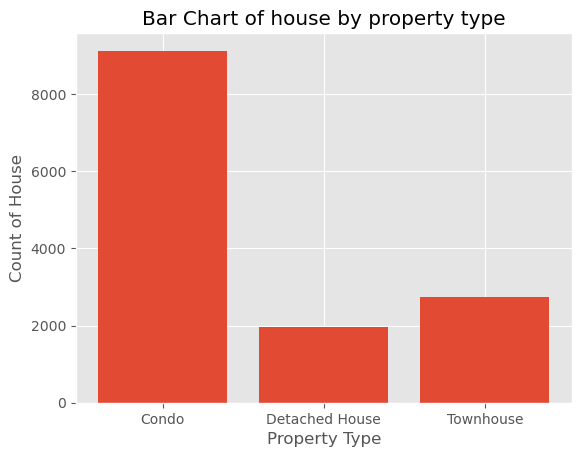

In [123]:
#house count by property type 
house_by_property_type = train.groupby('property_type')['id'].count()
house_by_property_type = house_by_property_type.reset_index()
plt.bar(house_by_property_type['property_type'], house_by_property_type['id'])
plt.xlabel('Property Type')
plt.ylabel('Count of House')
plt.title('Bar Chart of house by property type')

Text(0.5, 1.0, 'Bar Chart of house by province')

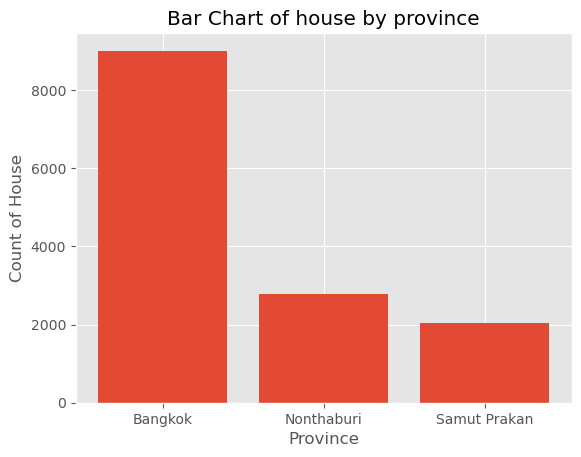

In [124]:
#house count by province 
house_by_province = train.groupby('province')['id'].count()
house_by_province = house_by_province.reset_index()
plt.bar(house_by_province['province'], house_by_province['id'])
plt.xlabel('Province')
plt.ylabel('Count of House')
plt.title('Bar Chart of house by province')

## study of target price


In [125]:
#house price descriptive statistics
round(train['price'].describe(),2)

count      13832.00
mean     4039261.02
std      2175259.86
min       480000.00
25%      2250000.00
50%      3500000.00
75%      5500000.00
max      9999000.00
Name: price, dtype: float64

Text(0.5, 1.0, 'house price distribution')

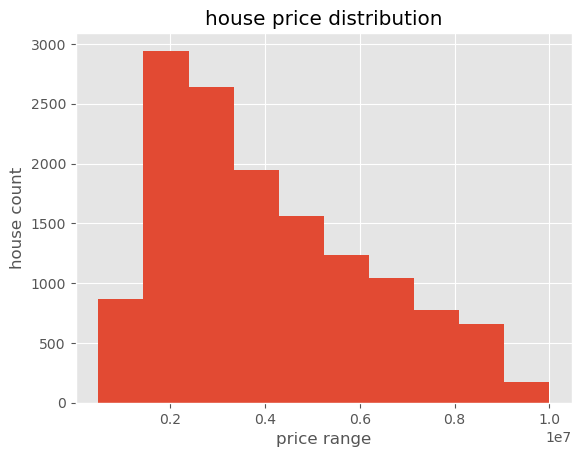

In [126]:
#house price distribution
plt.hist(train['price'], bins=10)
plt.ylabel('house count')
plt.xlabel('price range')
plt.title('house price distribution')

Text(0.5, 1.0, 'house price box plot')

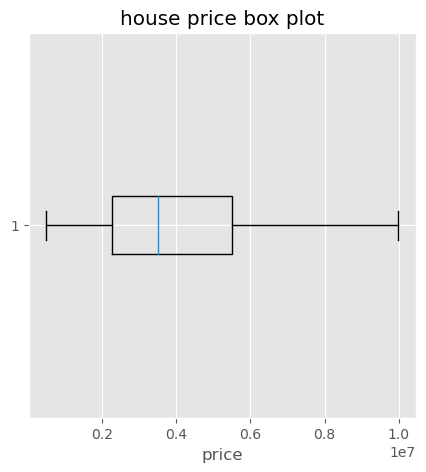

In [127]:
#house price boxplot
plt.figure(figsize=(5, 5))
plt.boxplot(train['price'], vert=False)  # vert=False for horizontal box plot
plt.xlabel('price')
plt.title('house price box plot')

In [128]:
#house price mean by property type
round(train.groupby('property_type')['price'].mean(),0).sort_values(ascending = False)

property_type
Detached House    5568336.0
Condo             3923175.0
Townhouse         3331694.0
Name: price, dtype: float64

In [129]:
#house price mean by province
round(train.groupby('province')['price'].mean(),0).sort_values(ascending = False)

province
Bangkok         4462499.0
Samut Prakan    3289335.0
Nonthaburi      3219560.0
Name: price, dtype: float64

In [130]:
#house price mean by district top 10
round(train.groupby('district')['price'].mean(),0).sort_values(ascending = False).head(10)

district
Bang Rak          6815807.0
Pathum Wan        6724390.0
Ratchathewi       6034428.0
Watthana          6013776.0
Khlong Toei       5719980.0
Bang Kho Laem     5680033.0
Thawi Watthana    5551818.0
Sathon            5548407.0
Phaya Thai        5184353.0
Khlong San        5068262.0
Name: price, dtype: float64

In [131]:
#house price mean by district bottom 10
round(train.groupby('district')['price'].mean(),0).sort_values(ascending = True).head(10)

district
Sai Noi                2421904.0
Chom Thong             2558027.0
Rat Burana             2616944.0
Bang Bua Thong         2778892.0
Mueang Samut Prakan    2793825.0
Phasi Charoen          2895613.0
Phra Samut Jadee       2938026.0
Lat Krabang            2941458.0
Mueang Nonthaburi      2965525.0
Bangkok Noi            2978727.0
Name: price, dtype: float64

In [132]:
#house price mean by district top 10
round(train.groupby('subdistrict')['price'].mean(),0).sort_values(ascending = False).head(10)

subdistrict
M Silom             9900000.0
StarView Rama 3     8962000.0
Chimphli            8900000.0
Beverly Tower       8800000.0
ASHTON Silom        7831667.0
Suriyawong          7652500.0
Rong Mueang         7375833.0
Bang Phueng         7300000.0
Silom               7103468.0
Khlong Toei Nuea    7042161.0
Name: price, dtype: float64

In [133]:
#house price mean by district bottom 10
round(train.groupby('subdistrict')['price'].mean(),0).sort_values(ascending = True).head(10)

subdistrict
624 Condolette Ladprao              1370000.0
Smart Condo Rama 2                  1435000.0
Khok Faet                           1550000.0
Bang Pu                             1697500.0
Krathum Rai                         1821429.0
Khlong Sam Prawet                   1829400.0
Plum Condo Chaengwattana Station    1871667.0
Kensington Condominium              1886250.0
Bang Khun Non                       1953333.0
Sai Kong Din Tai                    1955000.0
Name: price, dtype: float64

## check features' relationship with target price


In [134]:
feat_num1_price = ['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level','nearby_stations','nearby_bus_stops', 
             'nearby_supermarkets','nearby_shops', 'closest_station_distance','price']
feat_num1_vs_price = train[feat_num1_price].corr(numeric_only = True)['price'].sort_values(ascending = False)
feat_num1_vs_price 

price                       1.000000
floor_area                  0.337348
baths                       0.315202
nearby_shops                0.270491
nearby_stations             0.246067
bedrooms                    0.237947
nearby_supermarkets         0.227659
floor_level                 0.107250
nearby_bus_stops           -0.112550
closest_station_distance   -0.167494
total_units                -0.215108
Name: price, dtype: float64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'price vs house features scatterplot')

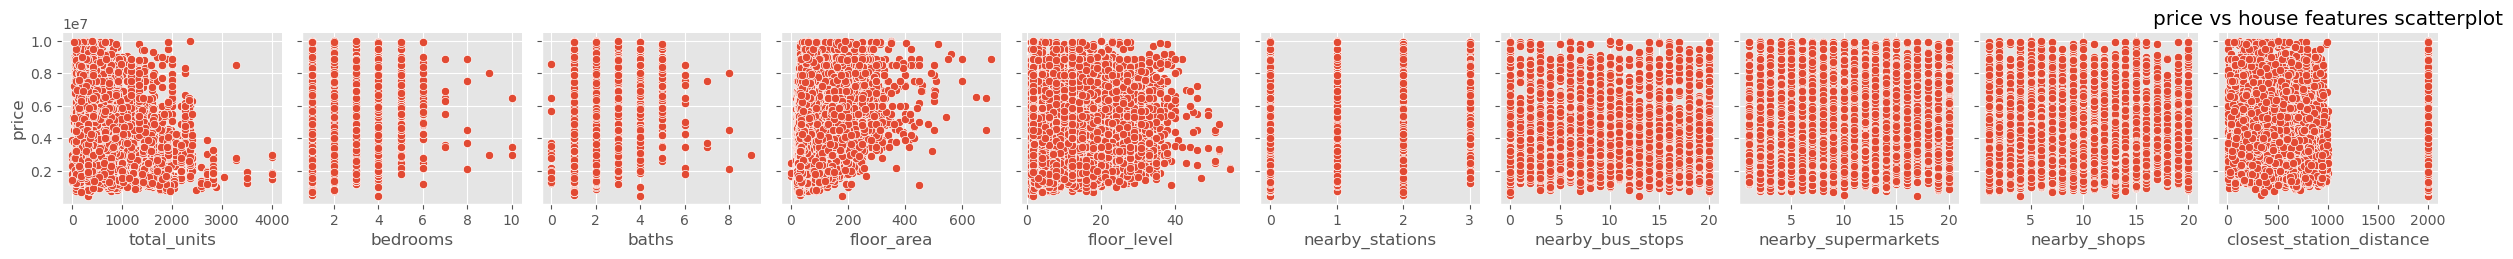

In [135]:
sns.pairplot(train[feat_num1_price], y_vars = ['price'], x_vars = ['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level','nearby_stations','nearby_bus_stops', 
             'nearby_supermarkets','nearby_shops', 'closest_station_distance'])
plt.title('price vs house features scatterplot')

In [136]:
feat_num2_price = ['Function room',
       'Fun pool', 'Community Plaza', 'Spa pool', 'Multi-purpose hall',
       'Elderly Wellness Stations', 'Community Garden', 'Playground',
       'Mini golf range', 'Pool Deck', 'Electrical Sub-Station',
       'Tennis courts', 'Squash court',
       'Existing Bus Stop', 'Mini-Mart', 'Sauna', 'Covered Linkways',
       'Gymnasium room', 'Basement car park', 'Jacuzzi', 'Meeting room',
       'Covered car park', 'Lift lobby', 'Swimming pool', 'Sky Lounge',
       'Basketball court', 'Karaoke', 'Pantry', 'Launderette', 'Lounge',
       'Cafes', 'BBQ pits', 'Badminton hall', 'Library', 'Steam bath',
       'Multi-Storey Car Park', 'Adult Fitness Stations', 'Wading pool',
       'Eateries', 'Lap pool', 'Utilities Center', 'Drop Off Point',
       'Bowling alley', 'Aircon Facilities', 'Clubhouse', 'Reflexology Path',
       'Game room', 'Amphitheatre', '24 hours security', 'CCTV', 'Pavillion',
       'Open car park', 'Car Park', 'Putting Green', 'Precinct Pavilion',
       'Jogging track', 'Main entrance', 'Billiards room', 'Fitness corner',
       'Driving range', 'Adventure park', 'Roof Terrace', 'Club',
       'Aerobic pool','price']

# top 20 faccilities that have positive corrleation with target price
train[feat_num2_price].corr(numeric_only = True)['price'].sort_values(ascending = False).head(20)

price                    1.000000
Jacuzzi                  0.131882
Clubhouse                0.122193
Lounge                   0.114067
Sauna                    0.110041
Steam bath               0.109999
Sky Lounge               0.103277
Community Garden         0.077998
Pool Deck                0.077503
Basement car park        0.068849
Function room            0.068737
Aircon Facilities        0.067505
Community Plaza          0.065576
Multi-Storey Car Park    0.063950
Club                     0.060066
Main entrance            0.056337
Pantry                   0.055547
Lap pool                 0.054765
Wading pool              0.049902
Fitness corner           0.048294
Name: price, dtype: float64

In [137]:
# bottom 20 faccilities that have negative and low positive corrleation with target price

train[feat_num2_price].corr(numeric_only = True)['price'].sort_values(ascending = True).head(20)

Mini-Mart                   -0.125354
Eateries                    -0.075218
Gymnasium room              -0.057530
Lift lobby                  -0.051737
Playground                  -0.043257
Launderette                 -0.042892
Elderly Wellness Stations   -0.040964
Cafes                       -0.038704
Basketball court            -0.034687
Multi-purpose hall          -0.015995
Mini golf range             -0.013532
Billiards room              -0.004233
Putting Green               -0.004187
Badminton hall              -0.003959
Covered car park            -0.001993
Covered Linkways             0.003752
Aerobic pool                 0.003908
Electrical Sub-Station       0.004802
Squash court                 0.005569
Bowling alley                0.009641
Name: price, dtype: float64

## check p value


In [138]:
# p value of numercial columns 

feat_num1 = ['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level','nearby_stations','nearby_bus_stops', 
             'nearby_supermarkets','nearby_shops', 'closest_station_distance'] 

X1 = train[feat_num1]
X1 = sm.add_constant(X1)
y1 = train['price']

#linear model
model = sm.OLS(y1,X1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:12:00   Log-Likelihood:            -2.1725e+05
No. Observations:               13832   AIC:                         4.345e+05
Df Residuals:                   13821   BIC:                         4.346e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.548e+05   8.74e+04     -4.061      0.000   -5.26e+05   -1.84e+05
total_units               -637.8813     30.006    -21.258      0.000    -696.697    -579.065
bedrooms                  1.038e+05   2.75e+04      3.778      0.000       5e+04    1.58e+05
baths                      7.58e+05   3.27e+04     23.179      0.000    6.94e+05    8.22e+05
floor_area                1.217e+04    363.906     33.432      0.000    1.15e+04    1.29e+04
floor_level               6.737e+04   2116.509     31.832      0.000    6.32e+04    7.15e+04
nearby_stations           5.986e+05   2.77e+04     21.577      0.000    5.44e+05    6.53e+05
nearby_bus_stops          6257.8390   1955.025      3.201      0.001    2425.725    1.01e+04
nearby_supermarkets       4.972e+04   3779.782     13.155      0.000    4.23e+04    5.71e+04
nearby_shops              7.279e+04   3200.352     22.743      0.000    6.65e+04    7.91e+04
closest_station_distance     3.9618     37.293      0.106      0.915     -69.137      77.061
==============================================================================
Omnibus:                      583.702   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.038
Skew:                           0.475   Prob(JB):                    9.74e-153
Kurtosis:                       3.558   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
# p value of facilities columns 

feat_num2 = ['Function room',
       'Fun pool', 'Community Plaza', 'Spa pool', 'Multi-purpose hall',
       'Elderly Wellness Stations', 'Community Garden', 'Playground',
       'Mini golf range', 'Pool Deck', 'Electrical Sub-Station',
       'Tennis courts', 'Squash court',
       'Existing Bus Stop', 'Mini-Mart', 'Sauna', 'Covered Linkways',
       'Gymnasium room', 'Basement car park', 'Jacuzzi', 'Meeting room',
       'Covered car park', 'Lift lobby', 'Swimming pool', 'Sky Lounge',
       'Basketball court', 'Karaoke', 'Pantry', 'Launderette', 'Lounge',
       'Cafes', 'BBQ pits', 'Badminton hall', 'Library', 'Steam bath',
       'Multi-Storey Car Park', 'Adult Fitness Stations', 'Wading pool',
       'Eateries', 'Lap pool', 'Utilities Center', 'Drop Off Point',
       'Bowling alley', 'Aircon Facilities', 'Clubhouse', 'Reflexology Path',
       'Game room', 'Amphitheatre', '24 hours security', 'CCTV', 'Pavillion',
       'Open car park', 'Car Park', 'Putting Green', 'Precinct Pavilion',
       'Jogging track', 'Main entrance', 'Billiards room', 'Fitness corner',
       'Driving range', 'Adventure park', 'Roof Terrace', 'Club',
       'Aerobic pool']

X2 = train[feat_num2]
X2 = sm.add_constant(X2)
y1 = train['price']

#linear model
model = sm.OLS(y1,X2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     29.25
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:12:00   Log-Likelihood:            -2.2059e+05
No. Observations:               13832   AIC:                         4.413e+05
Df Residuals:                   13767   BIC:                         4.418e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      3.816e+06   4.23e+04     90.130      0.000    3.73e+06     3.9e+06
Function room              4.842e+04   9.45e+04      0.512      0.608   -1.37e+05    2.34e+05
Fun pool                   1.688e+06   6.24e+05      2.705      0.007    4.65e+05    2.91e+06
Community Plaza            8.649e+05   2.23e+05      3.879      0.000    4.28e+05     1.3e+06
Spa pool                   -3.44e+05   1.17e+05     -2.934      0.003   -5.74e+05   -1.14e+05
Multi-purpose hall        -4.013e+05   9.74e+04     -4.120      0.000   -5.92e+05    -2.1e+05
Elderly Wellness Stations -1.789e+06   5.15e+05     -3.471      0.001    -2.8e+06   -7.79e+05
Community Garden           4.241e+05   5.39e+04      7.868      0.000    3.18e+05     5.3e+05
Playground                -2.011e+05   5.54e+04     -3.632      0.000    -3.1e+05   -9.26e+04
Mini golf range           -8.213e+05   2.16e+05     -3.810      0.000   -1.24e+06   -3.99e+05
Pool Deck                  3.711e+05   1.57e+05      2.359      0.018    6.28e+04    6.79e+05
Electrical Sub-Station    -7.034e+05   4.68e+05     -1.504      0.133   -1.62e+06    2.13e+05
Tennis courts              8.003e+05   1.89e+05      4.234      0.000     4.3e+05    1.17e+06
Squash court               1.594e+05   4.77e+05      0.334      0.738   -7.76e+05    1.09e+06
Existing Bus Stop         -3.915e+05   6.59e+05     -0.594      0.552   -1.68e+06       9e+05
Mini-Mart                 -8.085e+05   6.03e+04    -13.406      0.000   -9.27e+05    -6.9e+05
Sauna                      6.614e+05   5.63e+04     11.754      0.000    5.51e+05    7.72e+05
Covered Linkways          -1.499e+06   3.23e+06     -0.465      0.642   -7.82e+06    4.82e+06
Gymnasium room             -2.38e+05   7.65e+04     -3.111      0.002   -3.88e+05    -8.8e+04
Basement car park           4.31e+05    1.4e+05      3.082      0.002    1.57e+05    7.05e+05
Jacuzzi                    9.109e+05   8.67e+04     10.509      0.000    7.41e+05    1.08e+06
Meeting room              -1.232e+05   1.25e+05     -0.984      0.325   -3.69e+05    1.22e+05
Covered car park           2.542e+04    4.4e+04      0.578      0.563   -6.08e+04    1.12e+05
Lift lobby                 -3.97e+05   7.59e+04     -5.232      0.000   -5.46e+05   -2.48e+05
Swimming pool             -9380.2997    6.6e+04     -0.142      0.887   -1.39e+05     1.2e+05
Sky Lounge                 5.174e+05   7.59e+04      6.820      0.000    3.69e+05    6.66e+05
Basketball court          -8.825e+05   1.36e+05     -6.512      0.000   -1.15e+06   -6.17e+05
Karaoke                    8.601e+05   2.51e+05      3.424      0.001    3.68e+05    1.35e+06
Pantry                     2.128e+06   5.45e+05      3.908      0.000    1.06e+06     3.2e+06
Launderette               -2.752e+05   7.88e+04     -3.493      0.000    -4

# 4. build & evalute the model on train data (linear regression, ridge, lasso)


## Modeling approach

1) we will input all features that are available except 3 following columns 
     - land area because it has too many null value and its null value not randomly missing; it only missing in condo property type
     - year built because it has too many null value and it does not make sense to impute year value with mean, median, or mode data 
     
     - month built because month should not be useful with year built columsn
2) after feature all available columns, we will tune the performance of the model by using regularization

3) we will use 6 models including 
     - linear regression model
     - linear regression model with scaling
     - ridge model 
     - ridge model with scaling
     - lasso model
     - lasso model with scaling 
4) then we will evaluate each model with R2 and RMSE and select one the have best result 
     - test result have high R2 score
     - test result have low RMSE
     - test result have small gap from train result in term of R2 score 
     - test result have small gap from train result in term of RMSE

## Feature engineering

In [140]:
# create numercial features and categorical features 

feat_num1 = ['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level','nearby_stations','nearby_bus_stops', 
             'nearby_supermarkets','nearby_shops', 'closest_station_distance'] 
feat_num2 = ['Function room',
       'Fun pool', 'Community Plaza', 'Spa pool', 'Multi-purpose hall',
       'Elderly Wellness Stations', 'Community Garden', 'Playground',
       'Mini golf range', 'Pool Deck', 'Electrical Sub-Station',
       'Tennis courts', 'Squash court',
       'Existing Bus Stop', 'Mini-Mart', 'Sauna', 'Covered Linkways',
       'Gymnasium room', 'Basement car park', 'Jacuzzi', 'Meeting room',
       'Covered car park', 'Lift lobby', 'Swimming pool', 'Sky Lounge',
       'Basketball court', 'Karaoke', 'Pantry', 'Launderette', 'Lounge',
       'Cafes', 'BBQ pits', 'Badminton hall', 'Library', 'Steam bath',
       'Multi-Storey Car Park', 'Adult Fitness Stations', 'Wading pool',
       'Eateries', 'Lap pool', 'Utilities Center', 'Drop Off Point',
       'Bowling alley', 'Aircon Facilities', 'Clubhouse', 'Reflexology Path',
       'Game room', 'Amphitheatre', '24 hours security', 'CCTV', 'Pavillion',
       'Open car park', 'Car Park', 'Putting Green', 'Precinct Pavilion',
       'Jogging track', 'Main entrance', 'Billiards room', 'Fitness corner',
       'Driving range', 'Adventure park', 'Roof Terrace', 'Club',
       'Aerobic pool']
feat_cat = ['province', 'district', 'subdistrict','property_type','closest_station_name']

train[feat_num1 + feat_num2 + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
Index: 13832 entries, 0 to 14270
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_units                13832 non-null  float64
 1   bedrooms                   13832 non-null  float64
 2   baths                      13832 non-null  float64
 3   floor_area                 13832 non-null  int64  
 4   floor_level                13832 non-null  float64
 5   nearby_stations            13832 non-null  int64  
 6   nearby_bus_stops           13832 non-null  float64
 7   nearby_supermarkets        13832 non-null  float64
 8   nearby_shops               13832 non-null  int64  
 9   closest_station_distance   13832 non-null  int64  
 10  Function room              13832 non-null  int64  
 11  Fun pool                   13832 non-null  int64  
 12  Community Plaza            13832 non-null  int64  
 13  Spa pool                   13832 non-null  int64  


In [141]:
# dummify the categorical features
# determine variable x and variable x

X = pd.get_dummies(train[feat_num1 + feat_num2 + feat_cat], columns=feat_cat, drop_first=True, dtype=int)
y = train['price']

# Create train/test splits.

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(11065, 506)
(11065,)
(2767, 506)
(2767,)


## Linear regression & Scaling

In [142]:
# create linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# predict 
pred_train_lr = model_lr.predict(X_train)
pred_dev_lr = model_lr.predict(X_dev)

# evaluate R2 score and RSME
print("R2 Score of lr train :",  r2_score(y_train, pred_train_lr))
print("R2 Score of lr dev   :",  r2_score(y_dev, pred_dev_lr))
print()
print("RMSE of lr train :", mean_squared_error(y_train, pred_train_lr, squared=False))
print("RMSE of lr test  :", mean_squared_error(y_dev, pred_dev_lr, squared=False))

R2 Score of lr train : 0.733265035037376
R2 Score of lr dev   : 0.7027539388834788

RMSE of lr train : 1124778.233041639
RMSE of lr test  : 1179649.8264594853


Text(0.5, 1.0, 'coefficient distribution')

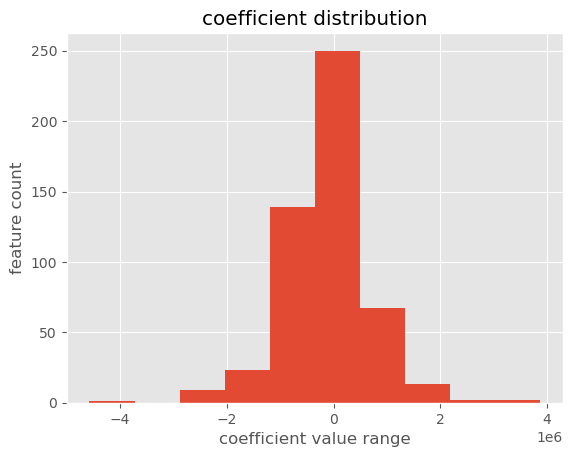

In [143]:
plt.hist(model_lr.coef_)
plt.ylabel('feature count')
plt.xlabel('coefficient value range')
plt.title('coefficient distribution')

In [144]:
# Scale our data
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_dev_scaled = pd.DataFrame(sc.transform(X_dev), columns=X_train.columns)

In [145]:
# create linear regression model for with scaling
model_lr_scaled = LinearRegression()
model_lr_scaled.fit(X_train_scaled, y_train)

# predict with scaling
pred_train_lr_scaled = model_lr.predict(X_train_scaled)
pred_dev_lr_scaled = model_lr.predict(X_dev_scaled)

# evaluate R2 score and RSME with scaling
print("R2 Score of lr train scaled :",  r2_score(y_train, pred_train_lr_scaled))
print("R2 Score of lr dev scaled  :",  r2_score(y_dev, pred_dev_lr_scaled))
print()
print("RMSE of lr train scaled :", mean_squared_error(y_train, pred_train_lr_scaled, squared=False))
print("RMSE of lr dev scaled  :", mean_squared_error(y_dev, pred_dev_lr_scaled, squared=False))

R2 Score of lr train scaled : -56.631420902544356
R2 Score of lr dev scaled  : -48.37886578396277

RMSE of lr train scaled : 16533187.550220955
RMSE of lr dev scaled  : 15204271.251186818


Text(0.5, 1.0, 'coefficient distribution')

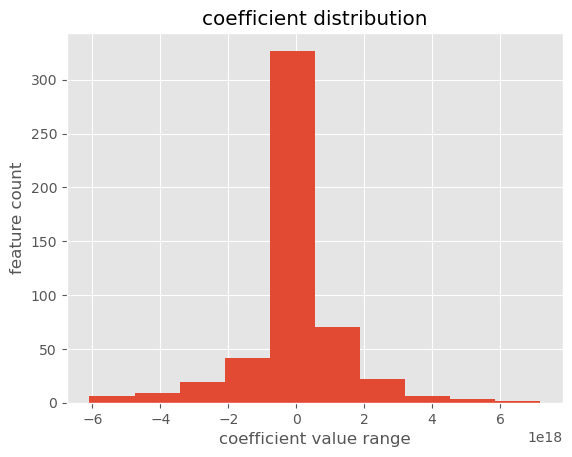

In [146]:
plt.hist(model_lr_scaled.coef_)
plt.ylabel('feature count')
plt.xlabel('coefficient value range')
plt.title('coefficient distribution')
   

## Ridge

In [147]:
# Instantiate; after testing with different alpha between 1,10,100,1000, we found that 10 generate the result
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train,y_train)

# predict
pred_train_ridge = ridge_model.predict(X_train)
pred_dev_ridge = ridge_model.predict(X_dev)

# evaluate R2 score and RSME
print("R2 Score of ridge train :",  ridge_model.score(X_train,y_train))
print("R2 Score of ridge dev  :",  ridge_model.score(X_dev,y_dev))
print()
print("RMSE of ridge train :", mean_squared_error(y_train, pred_train_ridge, squared=False))
print("RMSE of ridge dev  :", mean_squared_error(y_dev, pred_dev_ridge, squared=False))

R2 Score of ridge train : 0.7248028148124299
R2 Score of ridge dev  : 0.7066500123676196

RMSE of ridge train : 1142480.8321259413
RMSE of ridge dev  : 1171893.3533777783


Text(0.5, 1.0, 'coefficient distribution')

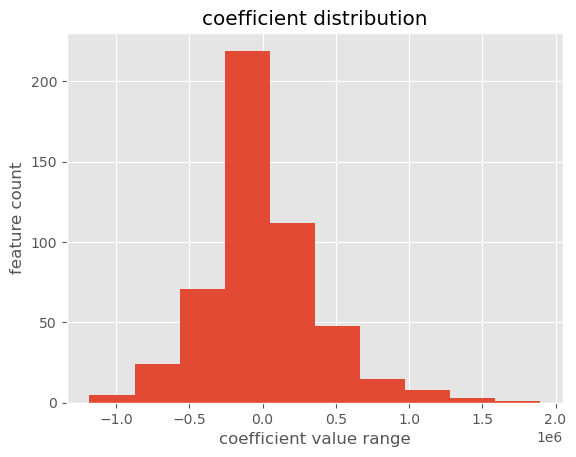

In [148]:
plt.hist(ridge_model.coef_)
plt.ylabel('feature count')
plt.xlabel('coefficient value range')
plt.title('coefficient distribution')
   

In [149]:
# Instantiate; after testing with different alpha between 1,10,100,1000, we found that 10 generate the result
ridge_model_scaled = Ridge(alpha=10)

# Fit.
ridge_model_scaled.fit(X_train_scaled,y_train)

# predict
pred_train_ridge_scaled = ridge_model_scaled.predict(X_train_scaled)
pred_dev_ridge_scaled = ridge_model_scaled.predict(X_dev_scaled)

# evaluate R2 score and RSME
print("R2 Score of Ridge train scaled :",  ridge_model_scaled.score(X_train_scaled,y_train))
print("R2 Score of Ridge dev scaled :",  ridge_model_scaled.score(X_dev_scaled,y_dev))
print()
print("RMSE of Ridge train scaled :", mean_squared_error(y_train, pred_train_ridge_scaled, squared=False))
print("RMSE of Ridge dev scaled :", mean_squared_error(y_dev, pred_dev_ridge_scaled, squared=False))

R2 Score of Ridge train scaled : 0.7332478269032698
R2 Score of Ridge dev scaled : 0.7025358925621921

RMSE of Ridge train scaled : 1124814.5144165126
RMSE of Ridge dev scaled : 1180082.4161302329


Text(0.5, 1.0, 'coefficient distribution')

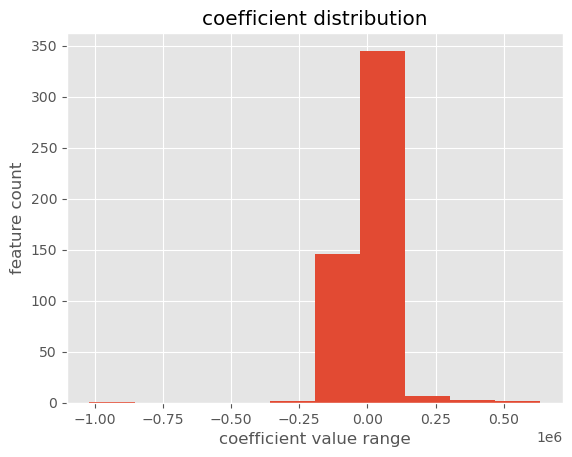

In [150]:
plt.hist(ridge_model_scaled.coef_)
plt.ylabel('feature count')
plt.xlabel('coefficient value range')
plt.title('coefficient distribution')


## Lasso

In [151]:
# Instantiate; after testing with different alpha between 1,10,100,1000, we found that 100 generate the result
lasso_model = Lasso(alpha=100)

# Fit.
lasso_model.fit(X_train, y_train)

# predict
pred_train_lasso = lasso_model.predict(X_train)
pred_dev_lasso = lasso_model.predict(X_dev)

# evaluate R2 score and RSME
print("R2 Score of lasso train :",  lasso_model.score(X_train,y_train))
print("R2 Score of lasso dev  :",  lasso_model.score(X_dev,y_dev))
print()
print("RMSE of lasso train :", mean_squared_error(y_train, pred_train_lasso, squared=False))
print("RMSE of lasso dev  :", mean_squared_error(y_dev, pred_dev_lasso, squared=False))

R2 Score of lasso train : 0.7320412957064382
R2 Score of lasso dev  : 0.7058156251356307

RMSE of lasso train : 1127355.4359493805
RMSE of lasso dev  : 1173558.8017695292


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.123e+14, tolerance: 5.248e+12
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'coefficient distribution')

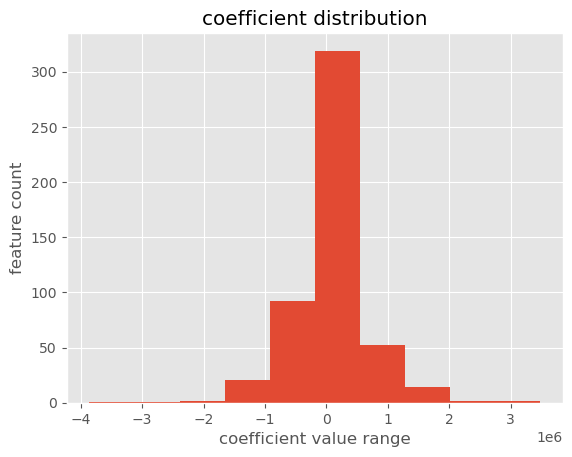

In [152]:
plt.hist(lasso_model.coef_)
plt.ylabel('feature count')
plt.xlabel('coefficient value range')
plt.title('coefficient distribution')


In [153]:
# Instantiate; after testing with different alpha between 1,10,100,1000, we found that 100 generate the result
lasso_model_scaled = Lasso(alpha=100)

# Fit.
lasso_model_scaled.fit(X_train_scaled,y_train)

# predict
pred_train_lasso_scaled = lasso_model_scaled.predict(X_train_scaled)
pred_dev_lasso_scaled = lasso_model_scaled.predict(X_dev_scaled)

# evaluate R2 score and RSME
print("R2 Score of lasso train scaled :",  lasso_model_scaled.score(X_train_scaled,y_train))
print("R2 Score of lasso dev scaled :",  lasso_model_scaled.score(X_dev_scaled,y_dev))
print()
print("RMSE of lasso train scaled :", mean_squared_error(y_train, pred_train_lasso_scaled, squared=False))
print("RMSE of lasso dev scaled :", mean_squared_error(y_dev, pred_dev_lasso_scaled, squared=False))

R2 Score of lasso train scaled : 0.7332523345427246
R2 Score of lasso dev scaled : 0.7028226407103105

RMSE of lasso train scaled : 1124805.0106894285
RMSE of lasso dev scaled : 1179513.4936495195


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.803e+14, tolerance: 5.248e+12
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'coefficient distribution')

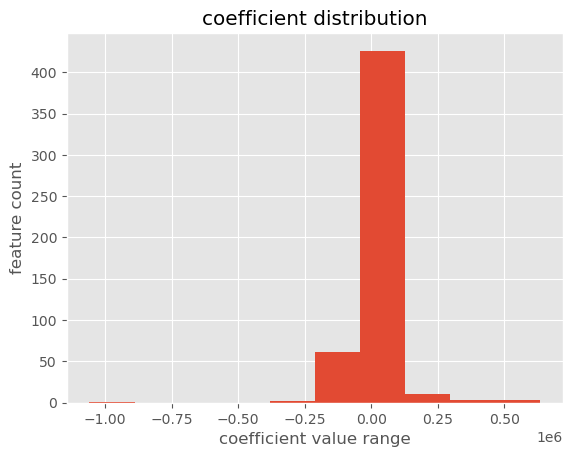

In [154]:
plt.hist(lasso_model_scaled.coef_)
plt.ylabel('feature count')
plt.xlabel('coefficient value range')
plt.title('coefficient distribution')


## Model result comparison and summary

||train R2 |test  R2 |train RMSE|test RMSE|
|---|---|---|---|---|
linear regression           | 0.7332  | 0.7027   |1,124,778     |1,179,649      |
linear regression scaled    | -56.6314| -48.3788 |16,533,187    |15,204,271     |
ridge with 𝛼=10             | 0.7248  | 0.7066   |1,142,480     |1,171,893      |
ridge with 𝛼=10 scaled      | 0.7332  | 0.7025   |1,468,594,882 |1,470,559,291  |
LASSO with 𝛼=100            | 0.7320  | 0.7058   |1,127,355     |1,173,558      |
LASSO with 𝛼=100 scaled     | 0.7332  | 0.7028   |1,524,795,112 |1,526,739,201  |

We will engineer 506 features and fit them into 6 models and find the result above. 
Based on the result comparision, 
 - ridge with 𝛼=10 wihtout scaling provide the best R2 score, RMSE, gap with between train and test result
 - we decide to ridge with 𝛼=10

Based on result of ridge with 𝛼=10 without scaling
 - the model have error that generate price deviat at 1,171,893 bht 
 - based on top coefficient in the result below, we recommend the following feature to add value to home price  
     - number of baht room add 6334kK bht per room 
     - size of floor area add 633k bht per 1sqm
     - number of bed rooms add 458 bht per room 
     - being in klongtun nua subdistrict add 266k baht per room
     - being detached house add 314k bht 
     - increase 1 floor level add 261k bht 
   

In [155]:
#checking the selected model (ridge model alpha 10 withou scaling) coefficient

ridge_model_scaled_coef = list(zip(X_train.columns,ridge_model_scaled.coef_))
df_ridge_model_scaled_coef = pd.DataFrame(ridge_model_scaled_coef, columns=['Features','Coefficient'])
# df_ridge_model_scaled_coef.sort_values(by='Coefficient', ascending = False).to_csv("coef.csv")
print(df_ridge_model_scaled_coef.sort_values(by='Coefficient', ascending = False).head(50))
print(df_ridge_model_scaled_coef.sort_values(by='Coefficient', ascending = False).tail(50))

                                    Features    Coefficient
3                                 floor_area  633505.819094
2                                      baths  633423.763365
1                                   bedrooms  458007.083129
469          closest_station_name_NO STATION  453954.518295
369             property_type_Detached House  314811.211305
239              subdistrict_Khlong Tan Nuea  266555.715095
4                                floor_level  261411.769051
131                        district_Watthana  229717.618188
344           subdistrict_Thanon Phetchaburi  173805.934982
120                     district_Ratchathewi  173004.491175
343            subdistrict_Thanon Phaya Thai  156142.858279
238                   subdistrict_Khlong Tan  154652.301198
102                     district_Khlong Toei  132313.574480
242             subdistrict_Khlong Toei Nuea  117663.378123
354               subdistrict_Thung Maha Mek  110724.900487
87                         district_Bang

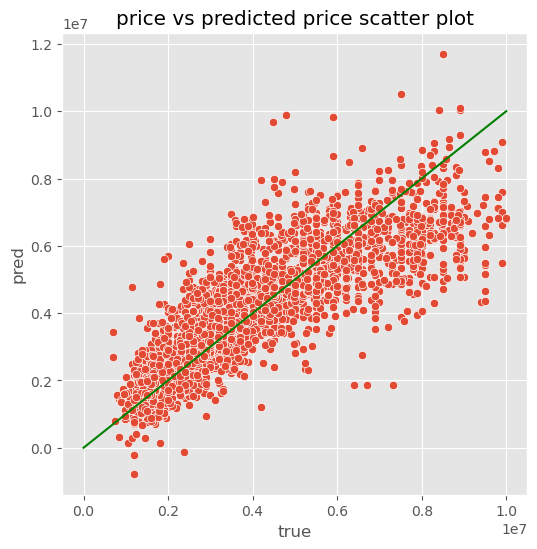

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


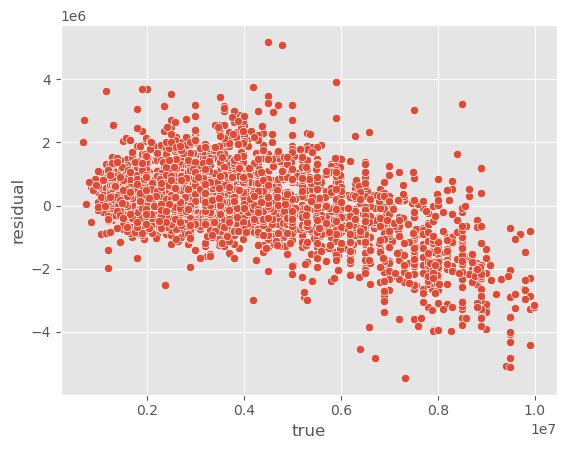

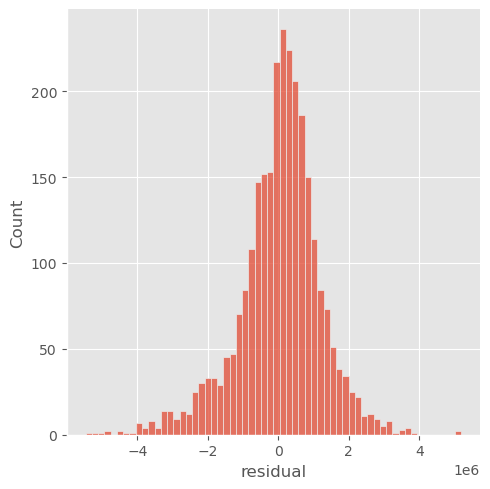

In [156]:
#checking the selected model (ridge model alpha 10 withou scaling) limitation


ridge_model_scaled_result = pd.DataFrame({'true':y_dev, 'pred':pred_dev_ridge_scaled})
ridge_model_scaled_result['residual'] = ridge_model_scaled_result['pred'] - ridge_model_scaled_result['true']

# true vs pred plot
plt.figure(figsize=(6,6))
sns.scatterplot(y='pred', x='true', data = ridge_model_scaled_result)
plt.plot(np.linspace(0, 1e7, 100), np.linspace(0, 1e7, 100), color='green')
plt.xlabel('true')
plt.ylabel('pred')
plt.title("price vs predicted price scatter plot")
plt.show()

# true vs residual 
sns.scatterplot(x='true', y='residual', data=ridge_model_scaled_result)

# residual distribution
sns.displot(x='residual', data=ridge_model_scaled_result);

# ---------- TEST DATA -----------

# 1 Check test data

In [157]:
test.shape

(2500, 22)

In [158]:
test.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."


In [159]:
test.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
dtype: object

In [160]:
test.describe()

,id,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built
count,2.500000e+03,1858.000000,2490.000000,2490.000000,2500.000000,1401.000000,841.000000,2500.000000,2500.000000,2500.000000,1026.000000,2414.000000,2500.000000,2500.000000
mean,1.063709e+07,713.160388,1.848193,1.601205,77.423200,11.233405,151.491082,13.762411,100.564914,0.946400,14.254386,9.140431,10.494400,1433.655600
std,7.743160e+05,577.473009,1.081384,0.854877,66.966167,8.885489,132.335460,0.092938,0.091116,1.069946,6.551753,5.439392,6.955208,912.882062
min,1.755218e+06,1.000000,1.000000,0.000000,17.000000,1.000000,20.000000,13.521062,100.052922,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.066092e+07,306.000000,1.000000,1.000000,31.000000,4.000000,80.000000,13.704274,100.514235,0.000000,8.000000,5.000000,4.000000,0.000000
50%,1.087636e+07,539.000000,1.000000,1.000000,46.000000,8.000000,112.000000,13.754998,100.571334,1.000000,17.000000,8.000000,9.000000,2013.000000
75%,1.098185e+07,954.000000,3.000000,2.000000,110.000000,17.000000,204.000000,13.838146,100.608291,2.000000,20.000000,13.000000,20.000000,2017.000000
max,1.104783e+07,4000.000000,10.000000,6.000000,564.000000,49.000000,2516.000000,14.095025,100.892813,3.000000,20.000000,20.000000,20.000000,2023.000000


In [161]:
test.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                   3
address                       0
property_type                 0
total_units                 642
bedrooms                     10
baths                        10
floor_area                    0
floor_level                1099
land_area                  1659
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    1222
nearby_bus_stops           1474
nearby_supermarkets          86
nearby_shops                  0
year_built                    0
month_built                1002
facilities                    0
dtype: int64

# 2 Clean and transform test data

In [162]:
# nearby_bus_stops(1474) is the numerical data, 
# and we believe that null data mean no nearby bus stop, so we will replace null value with "0"

# code below replace null with value o and check the replacement
test["nearby_bus_stops"].fillna(0, inplace = True)
test.loc[test['nearby_bus_stops']== 0,['nearby_bus_stops']].head(5)

,nearby_bus_stops
0,0.0
2,0.0
5,0.0
8,0.0
9,0.0


In [163]:
#impute 'total_units' columns with mean data by property type
totalunits_condo_mean_test = test[test['property_type']=='Condo']['total_units'].mean()
test.loc[(test['property_type']=='Condo') & (test['total_units'].isna()), 'total_units'] = totalunits_condo_mean_test

totalunits_townhouse_mean_test = test[test['property_type']=='Townhouse']['total_units'].mean()
test.loc[(test['property_type']=='Townhouse') & (test['total_units'].isna()), 'total_units'] = totalunits_townhouse_mean_test

totalunits_detachedhouse_mean_test = test[test['property_type']=='Detached House']['total_units'].mean()
test.loc[(test['property_type']=='Detached House') & (test['total_units'].isna()), 'total_units'] = totalunits_detachedhouse_mean_test

In [164]:
#impute 'floor_level' columns with mean data by property type
floorlevel_condo_mean_test = test[test['property_type']=='Condo']['floor_level'].mean()
test.loc[(test['property_type']=='Condo') & (test['floor_level'].isna()), 'floor_level'] = floorlevel_condo_mean_test
floorlevel_townhouse_mean_test = test[test['property_type']=='Townhouse']['floor_level'].mean()
test.loc[(test['property_type']=='Townhouse') & (test['floor_level'].isna()), 'floor_level'] = floorlevel_townhouse_mean_test
floorlevel_detachedhouse_mean_test = test[test['property_type']=='Detached House']['floor_level'].mean()
test.loc[(test['property_type']=='Detached House') & (test['floor_level'].isna()), 'floor_level'] = floorlevel_detachedhouse_mean_test

In [165]:
#check null data
test.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                   3
address                       0
property_type                 0
total_units                   0
bedrooms                     10
baths                        10
floor_area                    0
floor_level                   0
land_area                  1659
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    1222
nearby_bus_stops              0
nearby_supermarkets          86
nearby_shops                  0
year_built                    0
month_built                1002
facilities                    0
dtype: int64

In [166]:
test['nearby_supermarkets'].describe()

count    2414.000000
mean        9.140431
std         5.439392
min         1.000000
25%         5.000000
50%         8.000000
75%        13.000000
max        20.000000
Name: nearby_supermarkets, dtype: float64

In [167]:
#impute 'nearby_supermarkets' columns with mean data by property type
nearby_supermarkets_condo_mean_test = test[test['property_type']=='Condo']['nearby_supermarkets'].mean()
test.loc[(test['property_type']=='Condo') & (test['nearby_supermarkets'].isna()), 'nearby_supermarkets'] = nearby_supermarkets_condo_mean_test

nearby_supermarkets_townhouse_mean_test = test[test['property_type']=='Townhouse']['nearby_supermarkets'].mean()
test.loc[(test['property_type']=='Townhouse') & (test['nearby_supermarkets'].isna()), 'nearby_supermarkets'] = nearby_supermarkets_townhouse_mean_test

nearby_supermarkets_detachedhouse_mean_test = test[test['property_type']=='Detached House']['nearby_supermarkets'].mean()
test.loc[(test['property_type']=='Detached House') & (test['nearby_supermarkets'].isna()), 'nearby_supermarkets'] = nearby_supermarkets_detachedhouse_mean_test


In [168]:
test[test['subdistrict'].isnull()]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
540,8476937,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...,Condo,79.0,1.0,1.0,46,...,13.689652,100.606867,2,"[[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...",0.0,7.0,14,2012,July,"[Covered car park, Club, Clubhouse, CCTV, Fitn..."
1448,10605668,Bangkok,Sathon,None,ถนนนราธิวาสราช แขวงทุ่งมหาเมฆ เขตสาทร กทม.,Condo,361.0,2.0,2.0,66,...,13.717888,100.532691,3,"[[B2 Arkan Songkhro BRT, 120], [B1 Sathorn BRT...",20.0,16.0,16,2016,February,"[Covered car park, Club, CCTV, Fitness corner,..."
1993,10841475,Bangkok,Phra Khanong,None,ซอยสุขุมวิท 64 แขวงบางจาก เขตพระโขนง กรุงเทพมห...,Condo,79.0,1.0,2.0,74,...,13.689652,100.606867,2,"[[E11 Punnawithi BTS, 100], [E10 Bang Chak BTS...",0.0,7.0,14,2012,July,"[Covered car park, Club, Clubhouse, CCTV, Fitn..."


In [169]:
#impute subdistrict null value with Bang Chak
test.loc[(test['subdistrict'].isnull()) & (test['district'] == 'Phra Khanong'),'subdistrict'] = 'Bang Chak'

In [170]:
#impute subdistrict null value with Thung Maha Mek
test.loc[(test['subdistrict'].isnull()) & (test['district'] == 'Sathon'),'subdistrict'] = 'Thung Maha Mek'

In [171]:
test[test['bedrooms'].isnull()]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
98,10217747,Bangkok,Yan Nawa,Chong Nonsi,1298 Rama 3 Road,Condo,1296.000000,NaN,NaN,45,...,13.683574,100.549075,0,None,18.0,4.0,5,2006,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."
1215,10677829,Bangkok,Yan Nawa,Chong Nonsi,1298 Rama 3 Road,Condo,1296.000000,NaN,NaN,30,...,13.683574,100.549075,0,None,18.0,4.0,5,2006,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."
1242,10821164,Bangkok,Phasi Charoen,Bang Wa,Phetkasem Road,Condo,2047.000000,NaN,NaN,30,...,13.712975,100.433299,1,"[[BL36 Phasi Charoen MRT, 110]]",0.0,6.0,15,2020,None,"[Car Park, CCTV, Fitness corner, Jogging track..."
1579,10678013,Bangkok,Din Daeng,Din Daeng,Dindaeng Road,Condo,226.000000,NaN,NaN,23,...,13.762164,100.547749,0,None,0.0,14.0,19,2019,December,"[CCTV, Fitness corner, Multi-purpose hall, 24 ..."
1761,9978289,Samut Prakan,Bang Phli,Bang Phli Yai,99/451 ซอย 10 Yai,Detached House,370.831858,NaN,NaN,100,...,13.619726,100.682222,0,None,0.0,6.0,3,0,None,[]
1785,10632652,Bangkok,Lat Phrao,Lat Phrao,Lat Phrao,Detached House,370.831858,NaN,NaN,80,...,13.828917,100.661924,0,None,20.0,15.0,11,0,None,[Covered car park]
1922,10217146,Bangkok,Din Daeng,The Kris Extra 5,Ratchadaphisek 17 Ratchadaphisek Road,Condo,193.000000,NaN,NaN,27,...,13.786703,100.572415,2,"[[BL17 Sutthisan MRT, 380], [BL18 Huai Khwang ...",0.0,13.0,14,2012,June,"[Covered car park, Club, Clubhouse, CCTV, Fitn..."
1969,10691791,Bangkok,Phaya Thai,Sam Sen Nai,21 Pradiphat Road,Condo,981.000000,NaN,NaN,40,...,13.790871,100.546072,3,"[[N7 Saphan Kwai BTS, 480], [N6 Sena Ruam BTS,...",0.0,14.0,20,2019,October,"[BBQ pits, Covered car park, Clubhouse, CCTV, ..."
2432,10817739,Nonthaburi,Bang Bua Thong,Bang Rak Yai,89/9 ถนนสายบุรีรัมย์-ลำปลายมาศ,Townhouse,437.388489,NaN,NaN,153,...,13.870188,100.423016,1,"[[PP03 Sam Yaek Bang Yai MRT, 630]]",0.0,2.0,6,0,None,[]
2481,10587594,Samut Prakan,Mueang Samut Prakan,Bang Mueang Mai,สุขุมวิท117,Townhouse,437.388489,NaN,2.0,100,...,13.634562,100.591422,1,"[[E16 Pu Chao BTS, 330]]",0.0,3.0,4,0,None,[]


In [172]:
test[test['baths'].isnull()]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
98,10217747,Bangkok,Yan Nawa,Chong Nonsi,1298 Rama 3 Road,Condo,1296.000000,NaN,NaN,45,...,13.683574,100.549075,0,None,18.0,4.0,5,2006,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."
1215,10677829,Bangkok,Yan Nawa,Chong Nonsi,1298 Rama 3 Road,Condo,1296.000000,NaN,NaN,30,...,13.683574,100.549075,0,None,18.0,4.0,5,2006,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."
1242,10821164,Bangkok,Phasi Charoen,Bang Wa,Phetkasem Road,Condo,2047.000000,NaN,NaN,30,...,13.712975,100.433299,1,"[[BL36 Phasi Charoen MRT, 110]]",0.0,6.0,15,2020,None,"[Car Park, CCTV, Fitness corner, Jogging track..."
1579,10678013,Bangkok,Din Daeng,Din Daeng,Dindaeng Road,Condo,226.000000,NaN,NaN,23,...,13.762164,100.547749,0,None,0.0,14.0,19,2019,December,"[CCTV, Fitness corner, Multi-purpose hall, 24 ..."
1761,9978289,Samut Prakan,Bang Phli,Bang Phli Yai,99/451 ซอย 10 Yai,Detached House,370.831858,NaN,NaN,100,...,13.619726,100.682222,0,None,0.0,6.0,3,0,None,[]
1785,10632652,Bangkok,Lat Phrao,Lat Phrao,Lat Phrao,Detached House,370.831858,NaN,NaN,80,...,13.828917,100.661924,0,None,20.0,15.0,11,0,None,[Covered car park]
1922,10217146,Bangkok,Din Daeng,The Kris Extra 5,Ratchadaphisek 17 Ratchadaphisek Road,Condo,193.000000,NaN,NaN,27,...,13.786703,100.572415,2,"[[BL17 Sutthisan MRT, 380], [BL18 Huai Khwang ...",0.0,13.0,14,2012,June,"[Covered car park, Club, Clubhouse, CCTV, Fitn..."
1969,10691791,Bangkok,Phaya Thai,Sam Sen Nai,21 Pradiphat Road,Condo,981.000000,NaN,NaN,40,...,13.790871,100.546072,3,"[[N7 Saphan Kwai BTS, 480], [N6 Sena Ruam BTS,...",0.0,14.0,20,2019,October,"[BBQ pits, Covered car park, Clubhouse, CCTV, ..."
2273,10140719,Samut Prakan,Bang Phli,Bang Kaeo,Bangna-Trad Road Km.5,Condo,404.000000,1.0,NaN,30,...,13.663689,100.660345,0,None,10.0,7.0,4,2012,None,"[Car Park, CCTV, Fitness corner, 24 hours secu..."
2432,10817739,Nonthaburi,Bang Bua Thong,Bang Rak Yai,89/9 ถนนสายบุรีรัมย์-ลำปลายมาศ,Townhouse,437.388489,NaN,NaN,153,...,13.870188,100.423016,1,"[[PP03 Sam Yaek Bang Yai MRT, 630]]",0.0,2.0,6,0,None,[]


In [173]:
#impute 'bedrooms' columns with mean data by property type
bedrooms_condo_mean_test = test[test['property_type']=='Condo']['bedrooms'].mean()
test.loc[(test['property_type']=='Condo') & (test['bedrooms'].isna()), 'bedrooms'] = bedrooms_condo_mean_test

bedrooms_townhouse_mean_test = test[test['property_type']=='Townhouse']['bedrooms'].mean()
test.loc[(test['property_type']=='Townhouse') & (test['bedrooms'].isna()), 'bedrooms'] = bedrooms_townhouse_mean_test

bedrooms_detachedhouse_mean_test = test[test['property_type']=='Detached House']['bedrooms'].mean()
test.loc[(test['property_type']=='Detached House') & (test['bedrooms'].isna()), 'bedrooms'] = bedrooms_detachedhouse_mean_test

In [174]:
#impute 'baths' columns with mean data by property type
baths_condo_mean_test = test[test['property_type']=='Condo']['baths'].mean()
test.loc[(test['property_type']=='Condo') & (test['baths'].isna()), 'baths'] = baths_condo_mean_test

baths_townhouse_mean_test = test[test['property_type']=='Townhouse']['baths'].mean()
test.loc[(test['property_type']=='Townhouse') & (test['baths'].isna()), 'baths'] = baths_townhouse_mean_test

baths_detachedhouse_mean_test = test[test['property_type']=='Detached House']['baths'].mean()
test.loc[(test['property_type']=='Detached House') & (test['baths'].isna()), 'baths'] = baths_detachedhouse_mean_test

In [175]:
test.isnull().sum()

id                            0
province                      0
district                      0
subdistrict                   0
address                       0
property_type                 0
total_units                   0
bedrooms                      0
baths                         0
floor_area                    0
floor_level                   0
land_area                  1659
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    1222
nearby_bus_stops              0
nearby_supermarkets           0
nearby_shops                  0
year_built                    0
month_built                1002
facilities                    0
dtype: int64

In [176]:
#extract train stations and distances data

def closest_station(station_list, return_value='station_name'):
    if type(station_list) != list:
        if return_value == 'station_name':
            return "NO STATION"
        elif return_value == 'station_distance':
            return 2000
    else:
        if return_value == 'station_name':
            return station_list[0][0]
        elif return_value == 'station_distance':
            return station_list[0][1]

test['closest_station_name'] = test.nearby_station_distance.apply(lambda x: closest_station(x, 'station_name'))
test['closest_station_distance'] = test.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))

In [177]:
#check train stations and distances data
test.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,closest_station_name,closest_station_distance
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,0,None,0.0,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,...",NO STATION,2000
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ...",NO STATION,2000
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",0.0,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",BL20 Phra Ram 9 MRT,270
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor...",E6 Thong Lo BTS,70
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho...",NO STATION,2000


In [178]:
#extract facilities columns into facility column data

fac_set = set()
for fac in train['facilities']:
    for item in fac:
        fac_set.add(item)
fac_set

for fac in fac_set:
    test[fac] = test['facilities'].apply(lambda x: 1 if fac in x else 0)

In [179]:
test.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,Sauna,Covered car park,Bowling alley,Eateries,Clubhouse,Adventure park,24 hours security,Community Plaza,Elderly Wellness Stations,Fun pool
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,0,0,0,0,1,0,1,0,0,0
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,0,0,0,0,1,0,1,0,0,0
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,0,1,0,0,0,0,1,0,0,0
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,0,1,0,0,0,0,1,0,0,0
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,0,1,0,0,0,0,1,0,0,0


In [180]:
test.columns

Index(['id', 'province', 'district', 'subdistrict', 'address', 'property_type',
       'total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities',
       'closest_station_name', 'closest_station_distance', 'Community Garden',
       'Cafes', 'Multi-Storey Car Park', 'Roof Terrace', 'Aircon Facilities',
       'Putting Green', 'Amphitheatre', 'Club', 'Lap pool', 'Lounge',
       'Mini-Mart', 'Jacuzzi', 'Billiards room', 'Gymnasium room',
       'Drop Off Point', 'Playground', 'Sky Lounge', 'Aerobic pool',
       'Main entrance', 'Children's Playground', 'Launderette',
       'Mini golf range', 'Open car park', 'Meeting room', 'Karaoke', 'CCTV',
       'Basement car park', 'Wading pool', 'Pavillion', 'Jogging track',
       'Pool Deck', 'Multi-purpose hall', 'Driving range', 'Lif

In [181]:
test['nearby_supermarkets'].isnull().sum()

0

# 3 predict target price on test data

## Feature engineering

In [182]:
feat_num1 = ['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level','nearby_stations','nearby_bus_stops', 
             'nearby_supermarkets','nearby_shops', 'closest_station_distance'] 
feat_num2 = ['Function room',
       'Fun pool', 'Community Plaza', 'Spa pool', 'Multi-purpose hall',
       'Elderly Wellness Stations', 'Community Garden', 'Playground',
       'Mini golf range', 'Pool Deck', 'Electrical Sub-Station',
       'Tennis courts', 'Squash court',
       'Existing Bus Stop', 'Mini-Mart', 'Sauna', 'Covered Linkways',
       'Gymnasium room', 'Basement car park', 'Jacuzzi', 'Meeting room',
       'Covered car park', 'Lift lobby', 'Swimming pool', 'Sky Lounge',
       'Basketball court', 'Karaoke', 'Pantry', 'Launderette', 'Lounge',
       'Cafes', 'BBQ pits', 'Badminton hall', 'Library', 'Steam bath',
       'Multi-Storey Car Park', 'Adult Fitness Stations', 'Wading pool',
       'Eateries', 'Lap pool', 'Utilities Center', 'Drop Off Point',
       'Bowling alley', 'Aircon Facilities', 'Clubhouse', 'Reflexology Path',
       'Game room', 'Amphitheatre', '24 hours security', 'CCTV', 'Pavillion',
       'Open car park', 'Car Park', 'Putting Green', 'Precinct Pavilion',
       'Jogging track', 'Main entrance', 'Billiards room', 'Fitness corner',
       'Driving range', 'Adventure park', 'Roof Terrace', 'Club',
       'Aerobic pool']
feat_cat = ['province', 'district', 'subdistrict','property_type','closest_station_name']

test[feat_num1 + feat_num2 + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_units                2500 non-null   float64
 1   bedrooms                   2500 non-null   float64
 2   baths                      2500 non-null   float64
 3   floor_area                 2500 non-null   int64  
 4   floor_level                2500 non-null   float64
 5   nearby_stations            2500 non-null   int64  
 6   nearby_bus_stops           2500 non-null   float64
 7   nearby_supermarkets        2500 non-null   float64
 8   nearby_shops               2500 non-null   int64  
 9   closest_station_distance   2500 non-null   int64  
 10  Function room              2500 non-null   int64  
 11  Fun pool                   2500 non-null   int64  
 12  Community Plaza            2500 non-null   int64  
 13  Spa pool                   2500 non-null   int64

In [183]:
# xtest data preprocessing
X_test = pd.get_dummies(test[feat_num1 + feat_num2 + feat_cat], columns=feat_cat, drop_first=True, dtype=int)

In [184]:
X_test.columns

Index(['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'nearby_stations', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'closest_station_distance',
       ...
       'closest_station_name_S10 Talat Phlu BTS',
       'closest_station_name_S11 Wutthakat BTS',
       'closest_station_name_S2 Sala Daeng BTS',
       'closest_station_name_S3 Chong Nonsi BTS',
       'closest_station_name_S4 Saint Louis BTS',
       'closest_station_name_S5 Surasak BTS',
       'closest_station_name_S6 Saphan Taksin BTS',
       'closest_station_name_S8 Wongwian Yai BTS',
       'closest_station_name_S9 Pho Nimit BTS',
       'closest_station_name_W1 National Stadium BTS'],
      dtype='object', length=459)

In [185]:
# Code to correspond the category features in test data with that of train data
# assume that X_train and X_test is dummified dataframes

for col in X_train.columns: # iterate all columns in train data
    if col not in X_test.columns: # if the column is not in test data
        X_test[col] = 0 # make the column filled with 0 values

X_test = X_test[X_train.columns] # drop "columns exist only in test data" and sort in the same order

C:\Users\HP\AppData\Local\Temp\ipykernel_1852\762469366.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0 # make the column filled with 0 values
C:\Users\HP\AppData\Local\Temp\ipykernel_1852\762469366.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0 # make the column filled with 0 values
C:\Users\HP\AppData\Local\Temp\ipykernel_1852\762469366.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

## selected model prediction

In [186]:
# predict ridge alpha = 10 without scaling
pred_test_ridge = ridge_model.predict(X_test)
pred_test_ridge[:10]

array([5523680.0898768 , 6478587.0802264 , 5231198.42248869,
       6532429.54546095, 2365418.52738372, 5457344.28633247,
       3343322.99825286, 3919481.60130902, 3590953.1121422 ,
       3973900.53079833])

# ------- SUBMISSION ---------

## Generate the submission file and upload to kaggle

In [187]:
# save ridge with alpha=10 without scaling predict result as csv file
test['price'] = pred_test_ridge
test[['id','price']].to_csv('submission_ridgealpha=10_1_kaggle.csv', index=False)

## Conclusion with recommendation to the business problem

### Conclusions

- based on house data of 13832 houses in the market within 3 provinces including bangkok, samutprakan, and nonthaburi, 
    100% of house prices are between 0.48 mil bht and 9.99 mil bht
    50% of house prices are between 2.25 mil bht and 5.50 mil bht 
    average price is at 4.30 mil bht 
    median price is at 3.50 mil bht

- we found that there are several factors that are highly related to house price including 
    location (province, district, subdistrict)
    property type including condo, townhouse, and detached house
    size (floor levels, nbr of bothrooms, nbr of bedrooms)
    surrounding areas (nbr of nearby market place and public transport)
    extra facilities

- based on these factors, we able to come up with price prediction tool that help predict the price for price seller which are able to explain 70% of the target price. We can use this tool to predict the price of bangkok and surrounding provinces in the future. 

- however for the other provinces, the tools need adjustment because some factors will be different such as public transports which do not exist in the other provinces. 

- the tool we develop use 506 features, we have tested this tools witn 6 models and select the one with best R2 score, RMSE, and low gap between train and test result 
        
        ridge with 𝛼=10 wihtout scaling provide the best R2 score, RMSE, gap with between train and test result
        we decide to ridge with 𝛼=10

- based on result of ridge with 𝛼=10 without scaling

        the model have error that can generate price deviatopm at 1,171,893 bht 
        based on top coefficient in the result below, we recommend the following feature to add value to home price  
             - number of baht room add 6334k bht per room 
             - size of floor area add 633k bht per 1sqm
             - number of bed rooms add 458 bht per room 
             - being in klongtun nua subdistrict add 266k baht per room
             - being detached house add 314k bht 
             - increase 1 floor level add 261k bht 

### Business Recommendations

- Which factors appear to be most significant to a home? 
  
              size(number of bahtroom, number of bed room, floor area) location (bangkok central district such as klongton nua) and property type (detached house)
    
            
- Which features appear to add the most value to a home? 
       
             - number of baht room add 6334k bht per room 
             - size of floor area add 633k bht per 1sqm
             - number of bed rooms add 458 bht per room 
             - being in klongtun nua subdistrict add 266k baht per room
             - being detached house add 314k bht 
             
- Which features hurt the value of a home the most?
       
             - prperty type = townhouse
             - high density (too many total units in the same place)
             - location in Nonthaburi province
       
- What neighborhoods seem like they might be a good investment?
        
                in term of province, it is bangkok. 
                in term of district, it is wattana
                in term of subdistrict, it is klongton nua.